In [30]:
!pip install numpy matplotlib pandas tqdm

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
with open("metrics.json", encoding="utf-8") as f:
    metrics = json.load(f)

In [33]:
pd.set_option('display.max_rows', 30)

float_tests = [{"size": v["size"],**v["tests"][0]} for v in metrics if v["type"] == "float" and "size" in v]
float_tests_df = pd.DataFrame(float_tests)
float_tests_df = float_tests_df.sort_values("duration", ascending=True)

double_tests = [{"size": v["size"],**v["tests"][0]} for v in metrics if v["type"] == "double" and "size" in v]
double_tests_df = pd.DataFrame(double_tests)
double_tests_df = double_tests_df.sort_values("duration", ascending=True)

In [34]:
double_tests_df[double_tests_df["size"] == 10**8].sort_values("duration")

,size,duration,result,runtime
221,100000000,7.724600,3.332957e+07,OpenCL
269,100000000,7.749200,3.332957e+07,OpenCL
29,100000000,7.884500,3.332957e+07,OpenCL
173,100000000,7.935100,3.332957e+07,OpenCL
77,100000000,8.069900,3.332957e+07,OpenCL
...,...,...,...,...
5,100000000,283.699097,3.332957e+07,C++*
53,100000000,283.734406,3.332957e+07,C++*
293,100000000,283.737976,3.332957e+07,C++*
149,100000000,283.756195,3.332957e+07,C++*


In [35]:
def plot_metrics(metrics_df):
    markers = ['o', 's', '^', 'D']
    items = metrics_df.groupby("runtime")

    for i, (runtime, group) in enumerate(items):
        group = group.groupby('size', as_index=False).mean(numeric_only=True)
        group = group[group["size"] >= 10**3]
        
        plt.plot(group["size"],
                group["duration"],
                marker=markers[i % len(markers)],
                markersize=7,
                label=runtime)

    plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0)) 
    plt.xscale('log')
    plt.xlabel("N", labelpad=2)
    plt.ylabel("t,ms", labelpad=2)
    plt.legend()

    plt.legend(fontsize=10, loc='best', frameon=False)
    plt.tight_layout()
    plt.show()

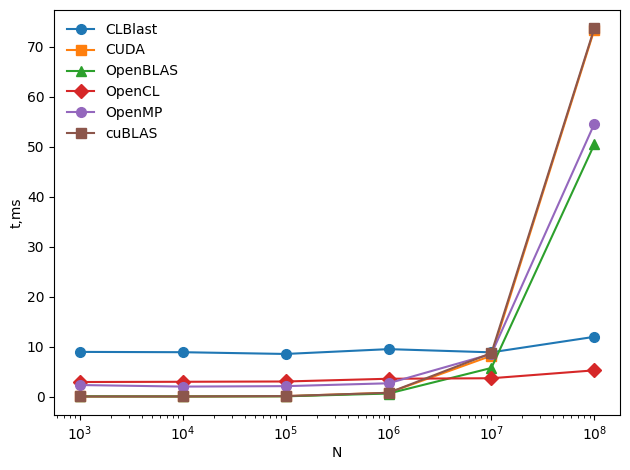

In [36]:
float_tests_df = float_tests_df[float_tests_df["runtime"] != "C++"]
float_tests_df = float_tests_df[float_tests_df["runtime"] != "C++*"]

plot_metrics(float_tests_df)

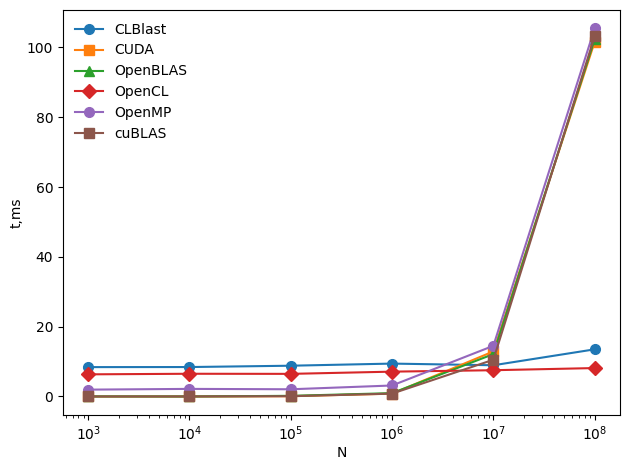

In [37]:
double_tests_df = double_tests_df[double_tests_df["runtime"] != "C++"]
double_tests_df = double_tests_df[double_tests_df["runtime"] != "C++*"]

plot_metrics(double_tests_df)

In [38]:
float_tests = [{"size": v["rows"],**v["tests"][0]} for v in metrics if v["type"] == "float" and "rows" in v]
float_tests_df = pd.DataFrame(float_tests)
float_tests_df = float_tests_df.sort_values("duration", ascending=True)

double_tests = [{"size": v["rows"],**v["tests"][0]} for v in metrics if v["type"] == "double" and "rows" in v]
double_tests_df = pd.DataFrame(double_tests)
double_tests_df = double_tests_df.sort_values("duration", ascending=True)

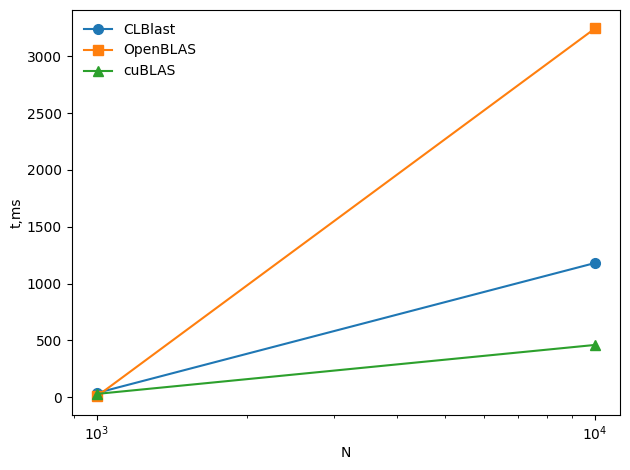

In [39]:
float_tests_df = float_tests_df[float_tests_df["runtime"] != "C++"]
float_tests_df = float_tests_df[float_tests_df["runtime"] != "C++*"]

plot_metrics(float_tests_df)

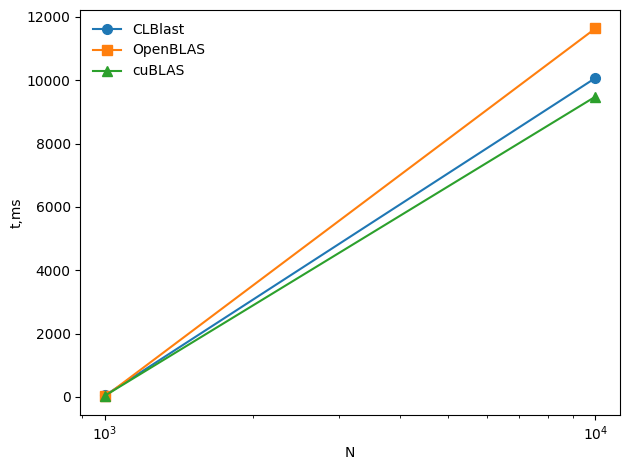

In [40]:
double_tests_df = double_tests_df[double_tests_df["runtime"] != "C++"]
double_tests_df = double_tests_df[double_tests_df["runtime"] != "C++*"]

plot_metrics(double_tests_df)